## This is MultiClass Classifcation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.1)
np.random.seed(5)

pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",100)

import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [2]:
df = pd.read_csv("train2processed.csv")

In [3]:
df.head()

,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,year,status,complaint
0,-0.036657,-0.055187,-0.110647,-0.039697,-0.049903,-0.067432,-0.113512,-0.332739,-0.092421,0.453600,0.080183,-0.299943,-0.221227,-0.561682,0.576793,0,11
1,-0.028851,-0.063915,-0.110647,-0.051555,-0.049903,-0.067432,-0.113512,-1.013496,-0.092421,-0.772484,-0.636941,-0.665364,-0.221227,-0.561682,0.082540,0,6
2,-0.039881,-0.062592,-0.110647,-0.047376,-0.049903,-0.067432,-0.113512,-0.332739,-0.006369,-0.176010,0.201256,1.300603,-0.221227,1.191979,0.741544,0,4
3,-0.036719,-0.061673,-0.110647,-0.044840,-0.049903,-0.067432,-0.113512,-0.332739,0.086911,-0.341697,-0.171276,-0.848075,-0.221227,-1.187990,0.412042,0,4
4,-0.037895,-0.059266,-0.110647,-0.044492,-0.049903,-0.067432,0.276888,-0.332739,-0.092421,0.089089,0.061557,1.300603,-0.221227,1.191979,0.576793,0,1


In [4]:
df['complaint'].value_counts()

6     7236
11    1896
9      955
8      936
12     811
1      696
0      451
5      448
2      448
4      332
10     170
3       24
7       11
Name: complaint, dtype: int64

### Split data for training

In [5]:
X = df.iloc[:,0:16]
y = df.iloc[:,16]

In [6]:
X.shape, y.shape

((14414, 16), (14414,))

In [7]:
X.head()

,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,year,status
0,-0.036657,-0.055187,-0.110647,-0.039697,-0.049903,-0.067432,-0.113512,-0.332739,-0.092421,0.453600,0.080183,-0.299943,-0.221227,-0.561682,0.576793,0
1,-0.028851,-0.063915,-0.110647,-0.051555,-0.049903,-0.067432,-0.113512,-1.013496,-0.092421,-0.772484,-0.636941,-0.665364,-0.221227,-0.561682,0.082540,0
2,-0.039881,-0.062592,-0.110647,-0.047376,-0.049903,-0.067432,-0.113512,-0.332739,-0.006369,-0.176010,0.201256,1.300603,-0.221227,1.191979,0.741544,0
3,-0.036719,-0.061673,-0.110647,-0.044840,-0.049903,-0.067432,-0.113512,-0.332739,0.086911,-0.341697,-0.171276,-0.848075,-0.221227,-1.187990,0.412042,0
4,-0.037895,-0.059266,-0.110647,-0.044492,-0.049903,-0.067432,0.276888,-0.332739,-0.092421,0.089089,0.061557,1.300603,-0.221227,1.191979,0.576793,0


In [8]:
y.head()

0    11
1     6
2     4
3     4
4     1
Name: complaint, dtype: int64

In [9]:
X.values, y.values

(array([[-0.03665733, -0.05518743, -0.11064659, ..., -0.56168241,
          0.57679284,  0.        ],
        [-0.02885072, -0.06391538, -0.11064659, ..., -0.56168241,
          0.08254006,  0.        ],
        [-0.03988054, -0.06259171, -0.11064659, ...,  1.19197883,
          0.74154377,  0.        ],
        ...,
        [-0.03275764, -0.06474268, -0.11064659, ..., -0.56168241,
          0.74154377,  0.        ],
        [ 0.03345022,  0.28149646,  1.57594367, ...,  2.25670173,
          0.47794228,  0.        ],
        [-0.03771727, -0.07475294, -0.11064659, ..., -0.56168241,
          0.41204191,  1.        ]]),
 array([11,  6,  4, ...,  4,  6,  0], dtype=int64))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [11]:
X_train.shape, X_test.shape

((11531, 16), (2883, 16))

### Model 1: KNN Classifier

In [12]:
neigh = KNeighborsClassifier()

In [13]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
ypred = neigh.predict(X_test)

In [15]:
ypred

array([ 6,  6, 12, ...,  6,  6,  6], dtype=int64)

In [16]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.06      0.06      0.06       139
           2       0.05      0.02      0.03        90
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        67
           5       0.03      0.01      0.02        90
           6       0.54      0.81      0.65      1447
           7       0.00      0.00      0.00         2
           8       0.03      0.01      0.02       187
           9       0.09      0.03      0.04       191
          10       0.00      0.00      0.00        34
          11       0.15      0.09      0.11       379
          12       0.00      0.00      0.00       162

    accuracy                           0.43      2883
   macro avg       0.07      0.08      0.07      2883
weighted avg       0.31      0.43      0.35      2883



In [17]:
cm = confusion_matrix(y_test,ypred)
cm

array([[   0,    5,    2,    0,    0,    5,   65,    0,    3,    2,    0,
           7,    1],
       [   2,    8,    6,    0,    3,    1,   90,    0,    5,    5,    0,
          15,    4],
       [   5,    4,    2,    0,    1,    5,   61,    0,    3,    3,    1,
           5,    0],
       [   2,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           2,    0],
       [   1,    2,    1,    0,    0,    2,   47,    0,    2,    5,    0,
           5,    2],
       [   6,    6,    3,    0,    0,    1,   56,    0,    3,    1,    0,
          14,    0],
       [  33,   42,   13,    2,   12,   12, 1179,    0,   24,   18,    1,
          89,   22],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    1,    0,
           0,    0],
       [   9,    4,    4,    0,    0,    2,  139,    0,    2,    3,    0,
          20,    4],
       [  11,    9,    1,    0,    1,    1,  135,    0,    2,    5,    0,
          23,    3],
       [   1,    3,    0,    0,    0,    1,   25, 

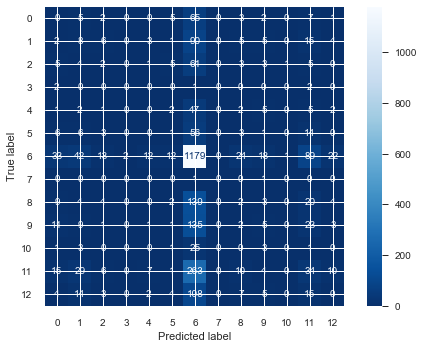

In [18]:
plot_confusion_matrix(neigh,X_test,y_test,values_format='.8g',cmap="Blues_r")
plt.show()

### Use Random Forest

In [19]:
rf = RandomForestClassifier()

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
ypred = rf.predict(X_test)

In [22]:
ypred

array([6, 6, 1, ..., 6, 6, 6], dtype=int64)

In [23]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.09      0.02      0.04        90
           1       0.06      0.02      0.03       139
           2       0.06      0.01      0.02        90
           3       0.00      0.00      0.00         5
           4       0.07      0.01      0.02        67
           5       0.06      0.01      0.02        90
           6       0.56      0.92      0.69      1447
           7       0.00      0.00      0.00         2
           8       0.06      0.02      0.03       187
           9       0.10      0.03      0.05       191
          10       0.00      0.00      0.00        34
          11       0.16      0.09      0.12       379
          12       0.10      0.03      0.05       162

    accuracy                           0.48      2883
   macro avg       0.10      0.09      0.08      2883
weighted avg       0.33      0.48      0.38      2883



In [24]:
cm = confusion_matrix(y_test,ypred)
cm

array([[   2,    1,    1,    0,    0,    1,   70,    0,    1,    2,    0,
          10,    2],
       [   1,    3,    1,    0,    2,    1,  100,    0,    5,    5,    0,
          18,    3],
       [   0,    3,    1,    0,    1,    1,   64,    0,    1,    4,    0,
          12,    3],
       [   0,    1,    0,    0,    0,    1,    1,    0,    0,    0,    0,
           1,    1],
       [   0,    1,    0,    0,    1,    1,   48,    0,    4,    3,    0,
           8,    1],
       [   3,    3,    2,    0,    0,    1,   59,    0,    2,    2,    0,
          16,    2],
       [   3,   10,    5,    0,    4,    4, 1333,    0,   21,   13,    1,
          41,   12],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           1,    0],
       [   2,    5,    1,    0,    1,    1,  147,    0,    3,    2,    0,
          21,    4],
       [   2,   10,    2,    0,    4,    0,  134,    0,    0,    6,    0,
          23,   10],
       [   0,    1,    0,    0,    0,    0,   26, 

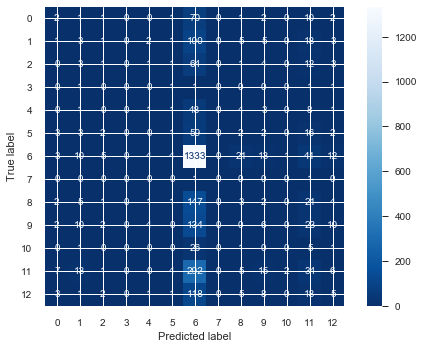

In [25]:
plot_confusion_matrix(rf,X_test,y_test,values_format='.4g',cmap="Blues_r")
plt.show()

### Use Gradient Boosting

In [26]:
gb = GradientBoostingClassifier()

In [27]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
ypred = gb.predict(X_test)

In [29]:
ypred

array([ 6,  6, 11, ...,  6,  6,  6], dtype=int64)

In [30]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.06      0.01      0.01       139
           2       0.17      0.02      0.04        90
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        67
           5       0.14      0.01      0.02        90
           6       0.56      0.96      0.70      1447
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00       187
           9       0.00      0.00      0.00       191
          10       0.00      0.00      0.00        34
          11       0.20      0.15      0.17       379
          12       0.00      0.00      0.00       162

    accuracy                           0.50      2883
   macro avg       0.09      0.09      0.07      2883
weighted avg       0.32      0.50      0.38      2883



In [31]:
cm = confusion_matrix(y_test,ypred)
cm

array([[   0,    1,    0,    1,    0,    0,   71,    0,    0,    1,    0,
          16,    0],
       [   1,    1,    1,    1,    0,    0,  101,    1,    3,    1,    0,
          29,    0],
       [   0,    1,    2,    0,    0,    2,   68,    0,    0,    2,    0,
          14,    1],
       [   0,    0,    0,    0,    0,    0,    2,    0,    0,    0,    0,
           3,    0],
       [   2,    0,    0,    1,    0,    0,   52,    0,    0,    0,    0,
          12,    0],
       [   0,    0,    0,    1,    0,    1,   62,    0,    0,    2,    1,
          23,    0],
       [   1,    3,    3,    1,    4,    3, 1384,    1,    3,    1,    8,
          33,    2],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           1,    0],
       [   0,    2,    1,    0,    0,    1,  157,    0,    0,    0,    2,
          23,    1],
       [   2,    1,    1,    0,    1,    0,  143,    0,    0,    0,    0,
          42,    1],
       [   0,    0,    0,    0,    0,    0,   28, 

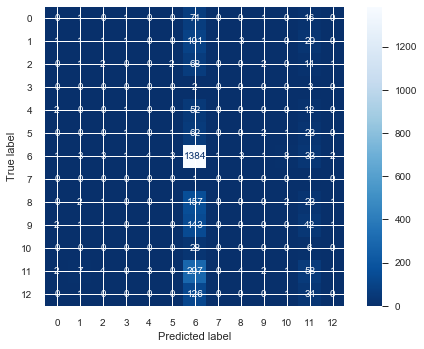

In [32]:
plot_confusion_matrix(gb,X_test,y_test,values_format='.4g',cmap="Blues_r")
plt.show()

**Use Gradient Boosting as it can detect more Heat/Hot water issues**

### Perform cross-validation

In [33]:
gbcv = cross_val_score(gb,X,y,scoring='f1_weighted',cv=5)

In [34]:
gbcv

array([0.38286622, 0.3744917 , 0.38113308, 0.38624939, 0.38510845])

In [35]:
gbcv.mean()

0.3819697681751885

### Find Feature Importances

In [36]:
features = gb.feature_importances_
features

array([0.10984976, 0.0874858 , 0.02747834, 0.0568786 , 0.01519838,
       0.02906877, 0.01362939, 0.01722954, 0.08957186, 0.06043816,
       0.07101922, 0.01894632, 0.00886295, 0.01374074, 0.04975984,
       0.33084232])

In [37]:
featuresdf = pd.DataFrame(features, columns=["Score"])

In [38]:
featuresdf

,Score
0,0.109850
1,0.087486
2,0.027478
3,0.056879
4,0.015198
5,0.029069
6,0.013629
7,0.017230
8,0.089572
9,0.060438


In [39]:
Xcols = pd.DataFrame(X.columns,columns=['Feature Names'])

In [40]:
Xcols

,Feature Names
0,lotarea
1,bldgarea
2,comarea
3,resarea
4,officearea
5,retailarea
6,numbldgs
7,numfloors
8,lotdepth
9,bldgdepth


In [41]:
featimpt = pd.concat([Xcols,featuresdf],axis=1)

In [42]:
featimpt

,Feature Names,Score
0,lotarea,0.109850
1,bldgarea,0.087486
2,comarea,0.027478
3,resarea,0.056879
4,officearea,0.015198
5,retailarea,0.029069
6,numbldgs,0.013629
7,numfloors,0.017230
8,lotdepth,0.089572
9,bldgdepth,0.060438


In [43]:
featimpt.set_index('Feature Names')

,Score
Feature Names,
lotarea,0.109850
bldgarea,0.087486
comarea,0.027478
resarea,0.056879
officearea,0.015198
retailarea,0.029069
numbldgs,0.013629
numfloors,0.017230
lotdepth,0.089572


In [44]:
df = featimpt.set_index('Feature Names')

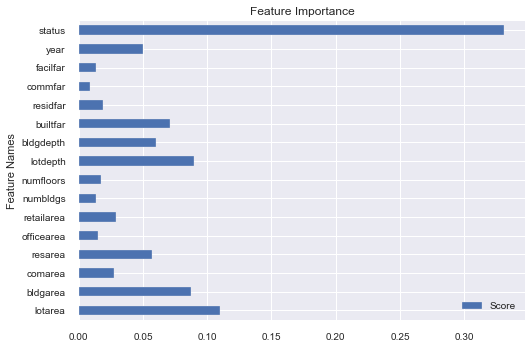

In [45]:
df.plot(kind='barh',title="Feature Importance", legend=True)
plt.show()

### Tips to improve better results
- Use more data to train (500000 to 800000 samples)
- Perform feature engineering to create new columns
- Model tuning using hyperparameter tuning
- Use more powerful algorithms like XGBoost